# Tarea 1: Regresión lineal

Crea una regresión lineal con los demás inputs numericos

'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households'

- Realiza un analisis bivariado de cada uno de estos
- Escribe la ecuación del modelo 
- Obtener R2 y mean squared error
- Grafica las predicciones 

Responde la pregunta: ¿Cuál es el mejor modelo de estos? ¿Por qué?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Visualización de datos

In [2]:
df = pd.read_csv('housing.csv')

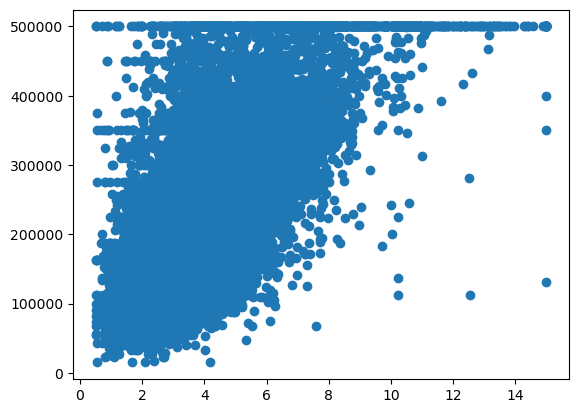

In [3]:
plt.scatter(df['median_income'], df['median_house_value'])

In [4]:
df = df[df.median_house_value != df.median_house_value.max()]

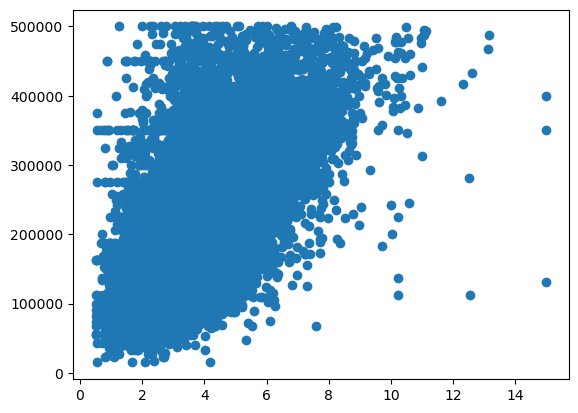

In [5]:
plt.scatter(df['median_income'], df['median_house_value'])

## Elección de variables

In [6]:
df = df.drop(columns=['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


Se utilizarán las siguientes variables para predecir el precio de las casas:

- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income

## Regresiones

In [7]:
y = df['median_house_value']

### Housing median age

In [8]:
X = df[['housing_median_age']]
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')

print("r2:",r2_score(y, model.predict(X)))

print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 177411.79806093415 + 530.7537495991417 * housing_median_age
r2: 0.004616870761556036
MSE: 9502976334.705992


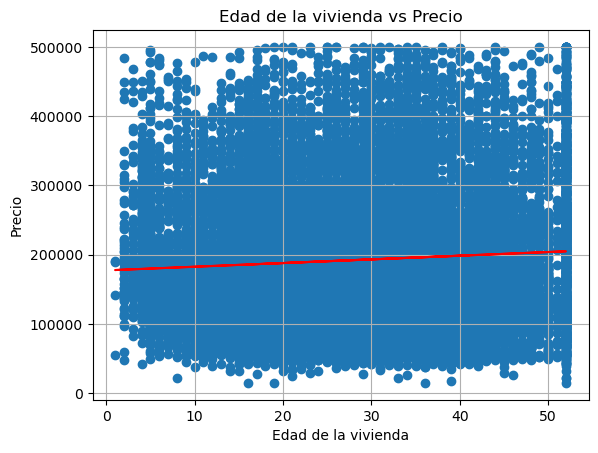

In [9]:
plt.scatter(df['housing_median_age'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')
plt.title('Edad de la vivienda vs Precio')
plt.xlabel('Edad de la vivienda')
plt.ylabel('Precio')
plt.grid();

Como podemos notar en la gráfica el modelo de regresión obtenido es muy malo, además esto se respalda gracias al r2 obtenido de 0.004, lo que significa que es muy ligeramente mejor al promedio, lo cual se ve en la linea del modelo. Por lo tanto la variable de la edad de la casa por si sola no es buena para predecir el precio de las casas.

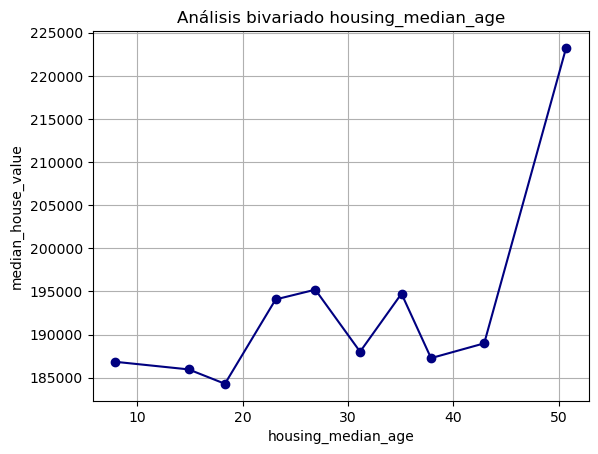

In [10]:
df['housing_median_age_bin'] = pd.qcut(df['housing_median_age'], 10, labels=False) + 1
grouped_median_age = df.groupby('housing_median_age_bin').mean()
plt.plot(grouped_median_age.housing_median_age, grouped_median_age.median_house_value, marker = 'o', c = 'navy')
plt.title('Análisis bivariado housing_median_age')
plt.xlabel('housing_median_age')
plt.ylabel('median_house_value')
plt.grid();

La gráfica del análisis bivariado muestra que la relación entre estas variables no es lineal debido a la forma que hay creada de un bin a otro, esto explica porque el modelo fue tan malo, pues el tipo de relación entre variable no es el utilizado, por lo que se podrían probar otro tipo de modelos, además que una vez que se llega a 50 años de edad de una casa el precio promedio se dispara.

### Total rooms

In [11]:
X = df[['total_rooms']]
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')
print("r2:",r2_score(y, model.predict(X)))
print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 175680.60158723383 + 6.4117690038903685 * total_rooms
r2: 0.020488694351853853
MSE: 9351447180.215874


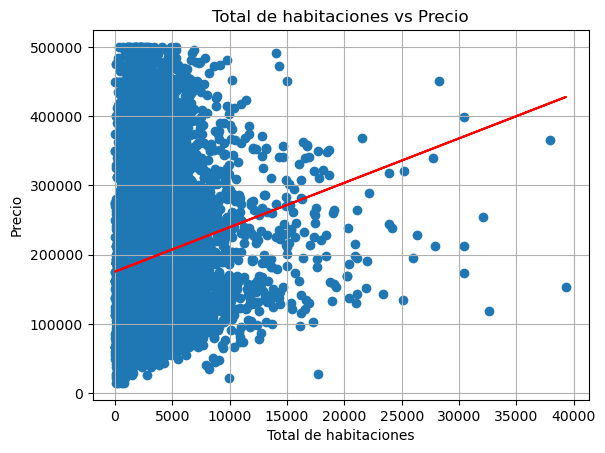

In [12]:
plt.scatter(df['total_rooms'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')
plt.title('Total de habitaciones vs Precio')
plt.xlabel('Total de habitaciones')
plt.ylabel('Precio')
plt.grid();

El modelo de regresión lineal obtenido utilizando la variable total_rooms es bastante malo como se puede notar en la gráfica, además de haber tenido un r2 de tan solo 0.02 lo cual es muy bajo.Utilizar la varible total_rooms por si sola como variable predictora para el precio de las casas es muy mala idea pues el modelo que crea no lograría predecir el valor de forma correcta.

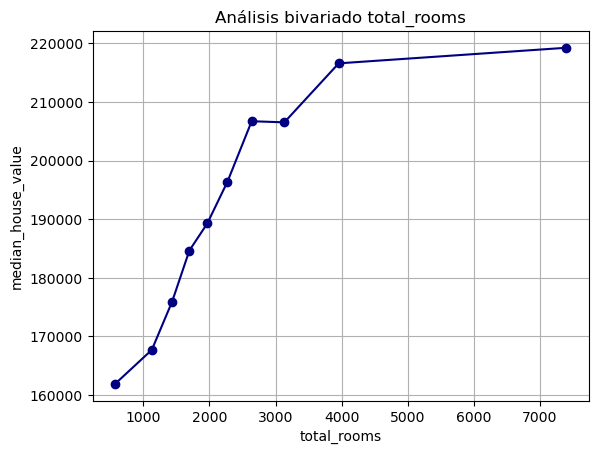

In [13]:
df['total_rooms_bin'] = pd.qcut(df['total_rooms'], 10, labels=False) + 1
grouped_total_rooms = df.groupby('total_rooms_bin').mean()
plt.plot(grouped_total_rooms.total_rooms, grouped_total_rooms.median_house_value, marker = 'o', c = 'navy')
plt.title('Análisis bivariado total_rooms')
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.grid();

La gráfica nos muestra que la relación entre las variables no es tan lineal, y que hay una mayor concentración de casas con menor cantidad de habitaciones por lo mostrado en la gráfica, esta concentración puede sesgar al modelo y explicar porque la regresión obtenida es tan mala.

### Total bedrooms

In [14]:
X = df[['total_bedrooms']]
X = X.fillna(0)
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')
print("r2:",r2_score(y, model.predict(X)))
print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 183455.69921142812 + 16.890480810370605 * total_bedrooms
r2: 0.005365082732013637
MSE: 9495833114.733957


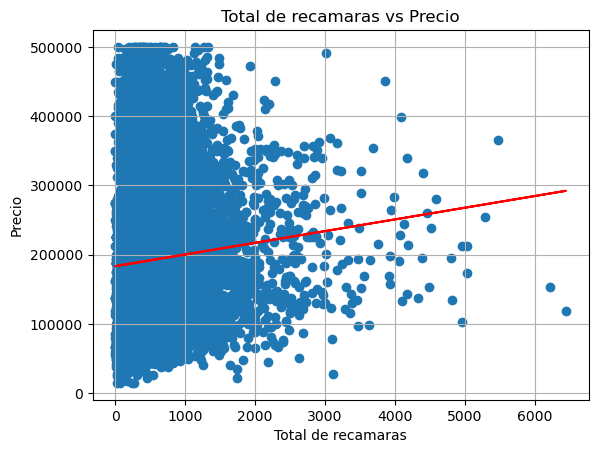

In [15]:
plt.scatter(df['total_bedrooms'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')
plt.title('Total de recamaras vs Precio')
plt.xlabel('Total de recamaras')
plt.ylabel('Precio')
plt.grid();

Utilizar total_bedrooms como variable predictora para el modelo de regresión lineal nos da un modelo muy malo como se ve en la gráfica y su r2 es muy bajo siendo de tan solo 0.005 por lo que es incapaz de explicar las variaciones del modelo, pues es casi 0. Debido a esto, el modelo no debería utilizarse para predecir el valor de las casas pues haría un muy mal trabajo.

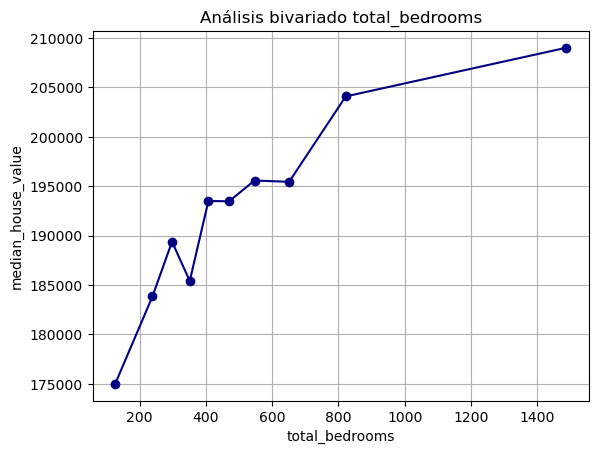

In [16]:
df['total_bedrooms_bin'] = pd.qcut(df['total_bedrooms'], 10, labels=False) + 1
grouped_total_bedrooms = df.groupby('total_bedrooms_bin').mean()
plt.plot(grouped_total_bedrooms.total_bedrooms, grouped_total_bedrooms.median_house_value, marker = 'o', c = 'navy')
plt.title('Análisis bivariado total_bedrooms')
plt.xlabel('total_bedrooms')
plt.ylabel('median_house_value')
plt.grid();

Al igual que en los casos anteriores la relación mostrada entra las variables no es lineal, se asemeja más a un crecimiento exponencial que luego se suaviza, además la concentración de casas es mayor en las que tienen una menor cantidad de recámaras, lo cual puede afectar al modelo, pues del noveno al décimo bin hay un salto muy rande en habitaciones, además que el precio de las casas en los primeros bins aumenta muy rápido.

### Population

In [17]:
X = df[['population']]
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')
print("r2:",r2_score(y, model.predict(X)))
print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 191005.0921058971 + 1.0222212946557103 * population
r2: 0.00014314747840926678
MSE: 9545687211.793383


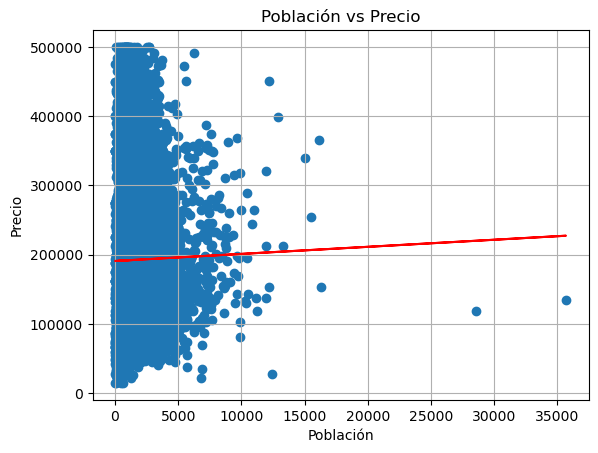

In [18]:
plt.scatter(df['population'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')
plt.title('Población vs Precio')
plt.xlabel('Población')
plt.ylabel('Precio')
plt.grid();

El modelo de regresión lineal obtenido usando population es muy malo, de hecho el pero de todos, teniendo un r2 de 0.0001, lo que significa que su poder predictivo es casi nulo y utilizar esta variable por si sola no es recomendable.

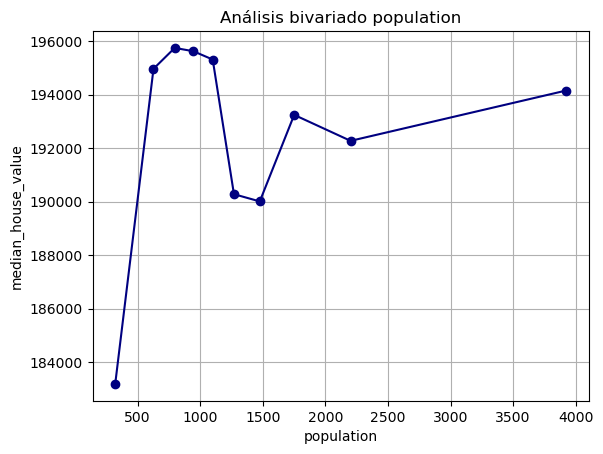

In [19]:
df['population_bin'] = pd.qcut(df['population'], 10, labels=False) + 1
grouped_population = df.groupby('population_bin').mean()
plt.plot(grouped_population.population, grouped_population.median_house_value, marker = 'o', c = 'navy')
plt.title('Análisis bivariado population')
plt.xlabel('population')
plt.ylabel('median_house_value')
plt.grid();

Claramente por la forma de la gráfica la relación no es lineal, además muestra que en las poblaciones más chicas el precio medio de las casas es mayor, esto hace sentido pues hay menos gente rica, por la forma de la gráfica es claro que un modelo que busca una relación lineal resultará ser muy malo como en nuestro caso.

### Households

In [20]:
X = df[['households']]
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')
print("r2:",r2_score(y, model.predict(X)))
print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 180352.83033455737 + 24.192794947647357 * households
r2: 0.009004884338978392
MSE: 9461083732.794487


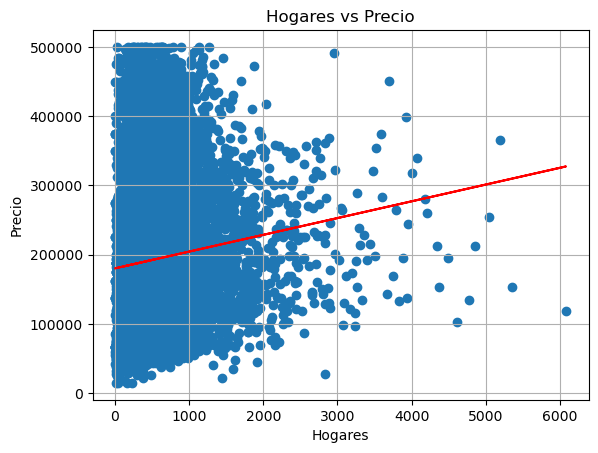

In [21]:
plt.scatter(df['households'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')
plt.title('Hogares vs Precio')
plt.xlabel('Hogares')
plt.ylabel('Precio')
plt.grid();

Igual que los demás modelos obtenidos, la variable households crea uno muy malo como se puede apreciar en la gráfica y tiene un r2 de 0.009, lo que significa que es apenas ligeremente mejor al promedio de los datos. Por si misma esta variable tiene muy poco poder predictivo.

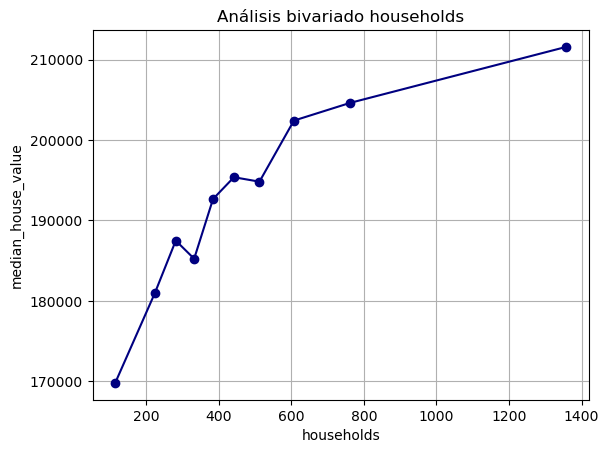

In [22]:
df['households_bin'] = pd.qcut(df['households'], 10, labels=False) + 1
grouped_households = df.groupby('households_bin').mean()
plt.plot(grouped_households.households, grouped_households.median_house_value, marker = 'o', c = 'navy')
plt.title('Análisis bivariado households')
plt.xlabel('households')
plt.ylabel('median_house_value')
plt.grid();

La forma de la gráfica es más una exponencial que se suaviza a una lineal, esto explica porque el modelo de regresión fue tan malo, pues no hay una relación lieneal que este pueda capturar.

### Median income

In [23]:
X = df[['median_income']]
model = linear_model.LinearRegression().fit(X, y)

print(f'Ecuación del modelo: {model.intercept_} + {model.coef_[0]} * {X.keys()[0]}')
print("r2:",r2_score(y, model.predict(X)))
print("MSE:",mean_squared_error(y, model.predict(X)))

Ecuación del modelo: 45456.9967823177 + 39987.01206231503 * median_income
r2: 0.41294861985820197
MSE: 5604611138.037092


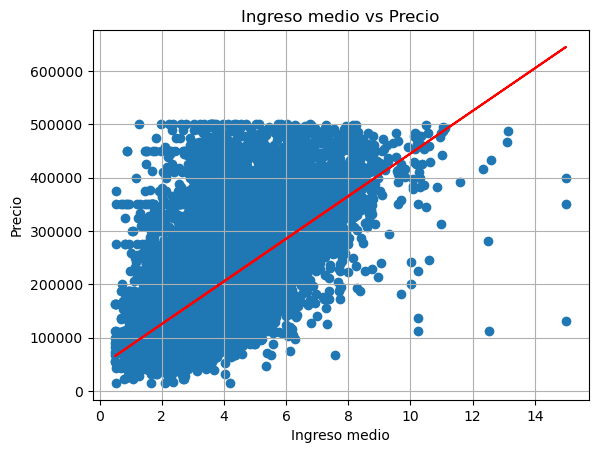

In [24]:
plt.scatter(df['median_income'], df['median_house_value'])
plt.plot(X, model.predict(X), color='red')
plt.title('Ingreso medio vs Precio')
plt.xlabel('Ingreso medio')
plt.ylabel('Precio')
plt.grid();

Como se muestra en la gráfica, el modelo obtenido usando la variable median_income tiene algo de sentido y capacidad predictora, contanto con un r2 de 0.41 lo cual ya es algo decente y bastante superior al promedio, por lo que por si misma la varible tiene poder predictivo para el precio de las casas.

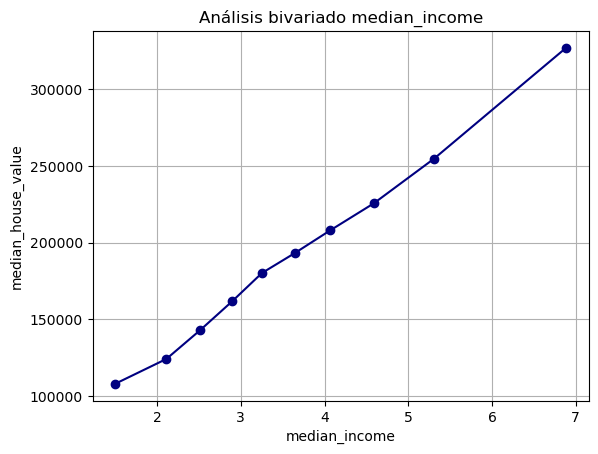

In [25]:
df['median_income_bin'] = pd.qcut(df['median_income'], 10, labels=False) + 1
grouped_income = df.groupby('median_income_bin').mean()
plt.plot(grouped_income.median_income, grouped_income.median_house_value, marker = 'o', c = 'navy')
plt.title('Análisis bivariado median_income')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.grid();

La forma de la gráfica es casi una linea recta, esto indica que si esxiste una relación lineal entre el ingreso de las personas y el precio de la casa, esto explica porque este fue el mejor modelo teniendo un r2 de 0.41, además el rango de esta variable es el más grande, estando entre 100,000 hasta casi 400,000, lo que significa que es una mejor variable que las demás con rangos más chicos, pues tiene la capacidad de encontrar casas en más rangos de precios que las demás manteniendo una relación lineal.

## Conclusiones

Una vez realizados los seis modelos con las variable numéricas y haber calculado su r2, nos podemos dar cuenta que cinco de ellos son modelos muy malos pues el de mayor r2 es de 0.02 lo cual significa que solo es mejor por un 2% al promedio de los datos. Sin embargo, el sexto modelo que fue utilizando como variable predictora el "median_income", resulto ser un modelo mejor ya que tuvo una r2 de 0.41, lo que significa que un 41% de la variación de los datos es explicada gracias al modelo, lo cual ya da algo de poder predictivo y si es bastante mejor que usar simplemente el promedio de los datos. Este modelo lo que nos dice es que por cada $\$1000$ de incremento en el ingreso, el valor de la casa aumenta $\$39,987$, un defecto de este modelo es que una persona sin ingresos tendría una casa de un valor de $\$45,456$ lo cual no es posible en la realidad.